In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Space server.csv')

In [3]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
#CHECKING for NULL values
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

# There are no NULL values.

In [6]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

# we are going to convert our Target variable('CLASS') to numeric type.

In [7]:
#CONVERTING our Target into integer format for further processing.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [8]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class          int32
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [9]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512


In [10]:
df['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

(array([4998.,    0.,    0.,    0.,    0.,  850.,    0.,    0.,    0.,
        4152.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

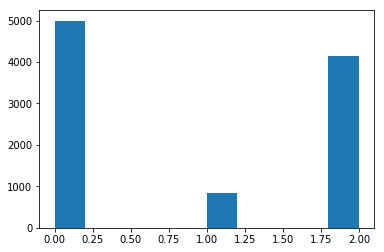

In [11]:
plt.hist(df['class'])

# Here we can see that the 'GALAXY' is occuring highest no. of times .i.e, Maximum observation out of whole observation is of GALAXY.

# QSO is having lowest count in our dataset i.e, QSO is having least observation out of whole dataset.

C:\Users\RK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x1440 with 0 Axes>

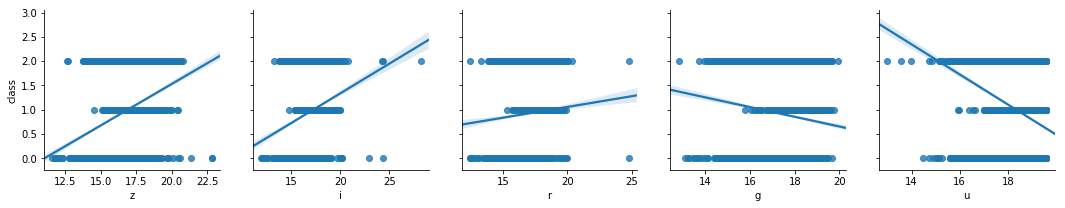

In [12]:
# Response of 5 bands TELESCOPE v/s CLASS
plt.figure(figsize = (10, 20))
sns.pairplot(df, x_vars=['z','i','r','g','u'], y_vars='class',height=3, kind='reg')

# Target variable('CLASS') is having +ve Co-relation with 'z' & 'i'.

# Target variable('CLASS') is having -ve Co-relation with 'g' & 'u'.

<Figure size 720x1440 with 0 Axes>

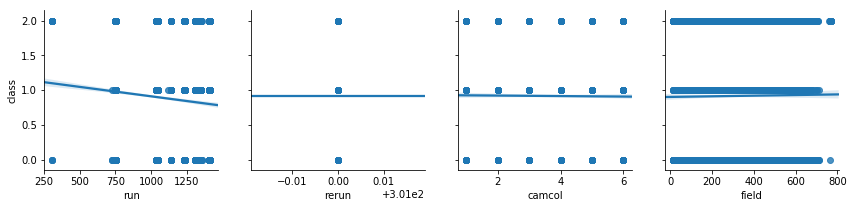

In [13]:
# Just to show above observation
plt.figure(figsize = (10, 20))
sns.pairplot(df, x_vars=['run','rerun','camcol','field'], y_vars='class',height=3, kind='reg')

# Run is having somewhat -ve co-relation rest all(rerun,camcol,field) are not having any kind of relation with our target(class).

# Above observation is true obviously, as we do more no. of scans the class is decresing.
#first comes GALAXY and in the galaxy, STARS are present.

<Figure size 720x1440 with 0 Axes>

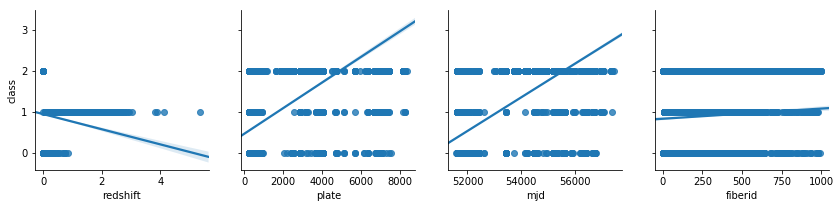

In [14]:
# Just to show above observation
plt.figure(figsize = (10, 20))
sns.pairplot(df, x_vars=['redshift','plate','mjd','fiberid'], y_vars='class',height=3, kind='reg')

Class is having -ve correlation with redshift.

Class is having +ve correlation with plate & MJD

<Figure size 720x1440 with 0 Axes>

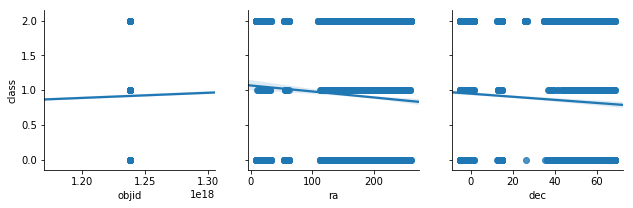

In [15]:
# Just to show above observation
plt.figure(figsize = (10, 20))
sns.pairplot(df, x_vars=['objid','ra','dec'], y_vars='class',height=3, kind='reg')

# These features are not having strong co-relation, as they specify direction of a point on the celestial sphere in the equatorial coordinate system.

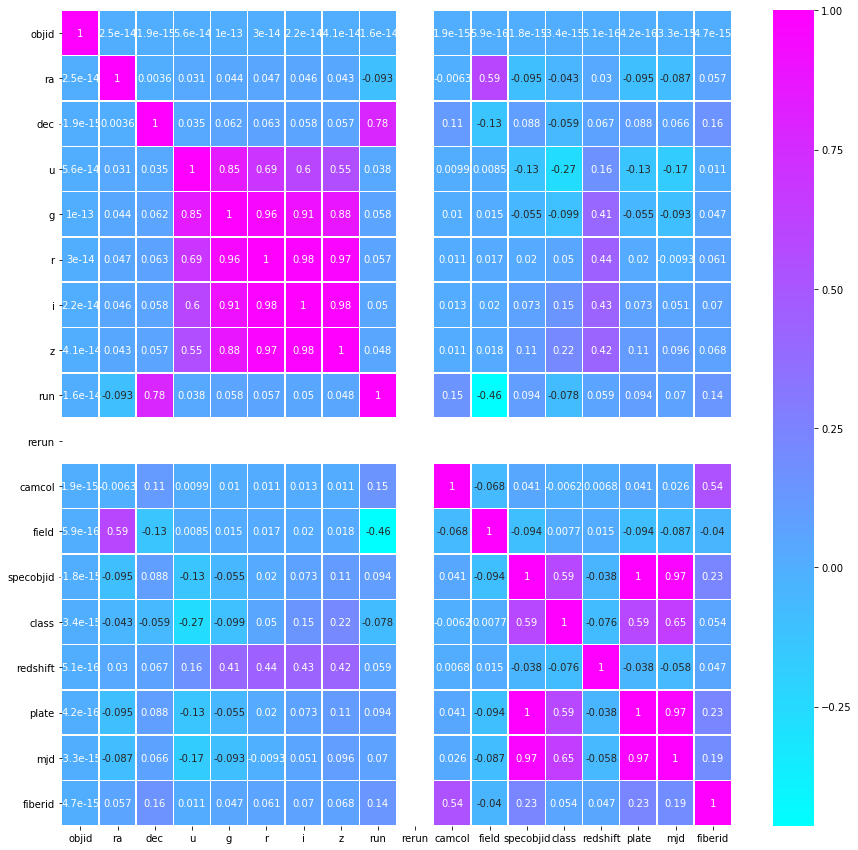

In [16]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True,cmap='cool',lw=0.5)

# We will drop 'rerun' as it is not having any relation with class

In [17]:
df.drop('rerun',axis=1,inplace=True)

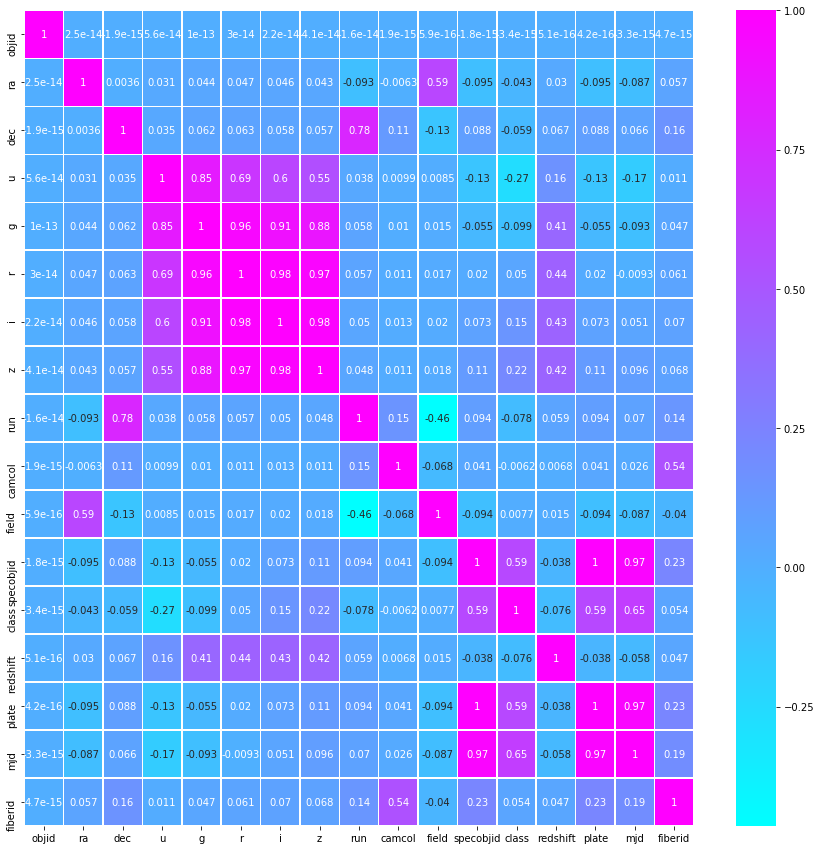

In [18]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True,cmap='cool',lw=0.5)

# We can observe that MJD, Plate, spaceobjid is having +ve co-relation with CLASS.

# 'g','u',run,redshift is having -ve co-relation with CLASS

# u,g,r,i,z are having +ve correlation between each other.

In [19]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


There are total 10,000 obseravtions in this dataset

-->PLATE is having HIGHEST Std.Deviation

-->MJD is having highest mean & median among all other features

In [20]:
#Checking for skewness & removing it.
df.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [21]:
from scipy.stats import boxcox

In [22]:
list=['objid','ra','dec','u','specobjid','redshift','plate','mjd']
for i in list:
    df[i].replace(0,df[i].mean(axis=0),inplace=True)

In [23]:
for i in list:
    df[i],l=boxcox(np.abs(df[i]))

C:\Users\RK\Anaconda3\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)


In [24]:
df.skew()

objid        1.000150
ra          -0.161587
dec          0.028441
u           -0.231932
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    0.000000
class        0.169292
redshift    -0.099261
plate        0.403780
mjd          0.000000
fiberid      0.308053
dtype: float64

# Therefore we have successfully removed skewness from our data.

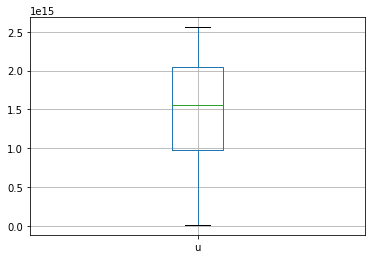

In [25]:
#Checking for OUTLIERS
df.boxplot('u')

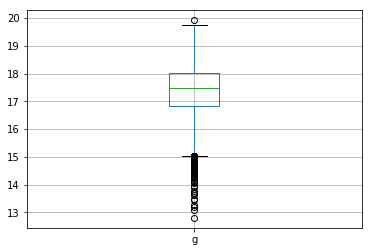

In [26]:
#Checking for OUTLIERS
df.boxplot('g')

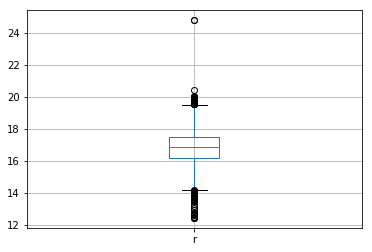

In [27]:
#Checking for OUTLIERS
df.boxplot('r')

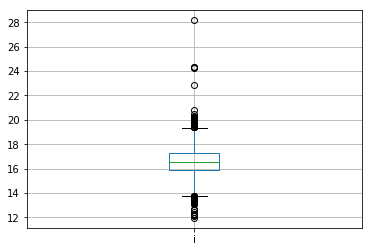

In [28]:
#Checking for OUTLIERS
df.boxplot('i')

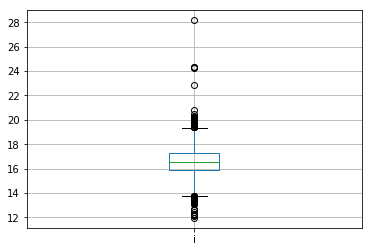

In [29]:
#Checking for OUTLIERS
df.boxplot('i')

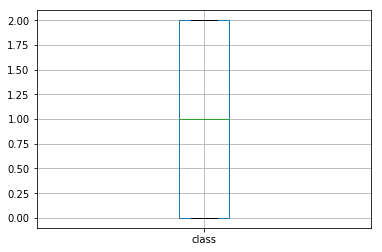

In [30]:
#Checking for OUTLIERS
df.boxplot('class')

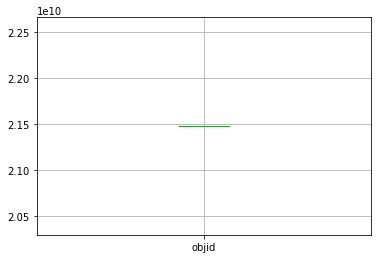

In [31]:
#Checking for OUTLIERS
df.boxplot('objid')

# Therefore we observed some OUTLIERs,now we will try to remove them from our dataset.

In [32]:
#REMOVING OUTLIERS
import scipy.stats as stats
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

In [33]:
df_clean= df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

In [34]:
df_clean.shape

(9168, 17)

In [35]:
df=df_clean

# Therefore we have successfully removed OUTLIERS from our dataset.

In [36]:
#MODEL TRAINING
df_x=df.drop('class',axis=1)

In [37]:
y=df['class']

In [38]:
df_x.shape

(9168, 16)

In [39]:
y.shape

(9168,)

In [40]:
#Scaling the Input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
#Train & Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [42]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (6417, 16)
y_train: (6417,)
x_test: (2751, 16)
y_test: (2751,)


In [43]:
from sklearn.model_selection import cross_val_score
model=[SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='accuracy')
    print("Score of",m,"is:")
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('standard deviation:',score.std())
    print('**********************************************************************************************************')
    print('\n')

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

Score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is:
Score: [0.9912778  0.99345835 0.9886562  0.98820961]
Mean Score: 0.9904004889900155
standard deviation: 0.0021191227635486715
**********************************************************************************************************


Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') is:
Score: [0.97514174 0.97601396 0.97425829 0.97161572]
Mean Score: 0.9742574253653811
standard deviation: 0.001646663914363137
**********************************************************************************************************


Score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_f

# Here SVC() is having highest mean accuracy score of 99%, Now we will find the best parameters for SVC

In [44]:
from sklearn.model_selection import GridSearchCV
svc=SVC(gamma='scale')
parameters={'C':[1,0.1,0.001],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
clf.best_params_

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 1, 'kernel': 'linear'}

In [45]:
#Now we will set the best parameters in our algorithm and apply algorithm on dataset.
svc=SVC(C=1, kernel= 'linear',gamma='scale')

In [46]:
svc.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
svc.score(x_train,y_train)

0.9932990494000312

In [48]:
pred=svc.predict(x_test)

In [49]:
print('Accuracy Score:       ',accuracy_score(y_test,pred))
print('Classification report:',classification_report(y_test,pred))
print('Confusion matrix:     ',confusion_matrix(y_test,pred))

Accuracy Score:        0.9909123954925482
Classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1417
           1       0.97      0.93      0.95       250
           2       1.00      1.00      1.00      1084

   micro avg       0.99      0.99      0.99      2751
   macro avg       0.99      0.98      0.98      2751
weighted avg       0.99      0.99      0.99      2751

Confusion matrix:      [[1409    7    1]
 [  17  233    0]
 [   0    0 1084]]


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf=RandomForestClassifier()

In [52]:
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9995324918186068


In [53]:
pred2=rf.predict(x_test)

In [54]:
print('Accuracy Score:       ',accuracy_score(y_test,pred2))
print('Classification report:',classification_report(y_test,pred2))
print('Confusion matrix:     ',confusion_matrix(y_test,pred2))

Accuracy Score:        0.9880043620501636
Classification report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1417
           1       0.97      0.91      0.94       250
           2       1.00      1.00      1.00      1084

   micro avg       0.99      0.99      0.99      2751
   macro avg       0.98      0.97      0.98      2751
weighted avg       0.99      0.99      0.99      2751

Confusion matrix:      [[1406    7    4]
 [  22  228    0]
 [   0    0 1084]]


# -->THEREFORE SVC() is the best algorithm for this dataset with 99% accuracy.

In [55]:
#SAVING OUR BEST MODEL i.e, svc
from sklearn.externals import joblib
joblib.dump(svc,'Space_Server.pkl')

['Space_Server.pkl']